In [ ]:
# Need matplotlib, numpy, sklearn
# To install:
# conda install numpy
# conda install matplotlib
# conda install scikit-learn

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Histograms

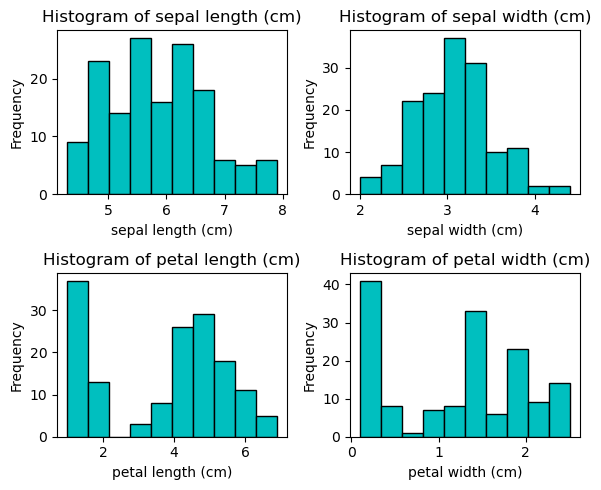

In [4]:
# Create a figure with a 2x2 layout of subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Flatten axs for easy iteration
axs = axs.flatten()

# Plot histograms for each feature
for i, ax in enumerate(axs):
    ax.hist(data[:, i], bins=10, color='c', edgecolor='black')
    ax.set_title(f'Histogram of {feature_names[i]}')
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')

# Display
plt.tight_layout()
plt.show()

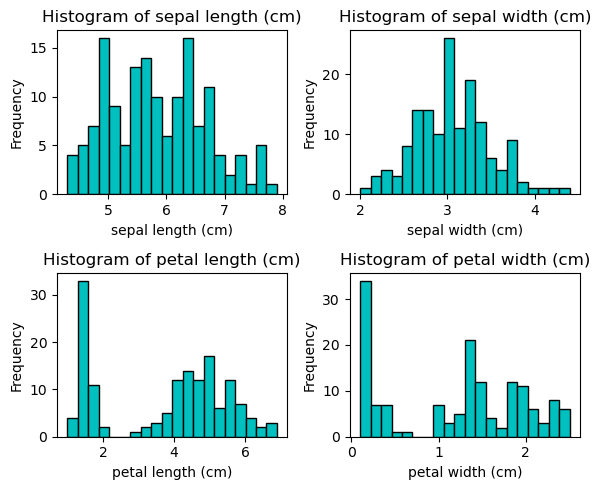

In [5]:
# Create a figure with a 2x2 layout of subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Flatten axs for easy iteration
axs = axs.flatten()

# Plot histograms for each feature
for i, ax in enumerate(axs):
    ax.hist(data[:, i], bins=20, color='c', edgecolor='black')
    ax.set_title(f'Histogram of {feature_names[i]}')
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')

# Display
plt.tight_layout()
plt.show()

# 2D Histograms on petal length and width

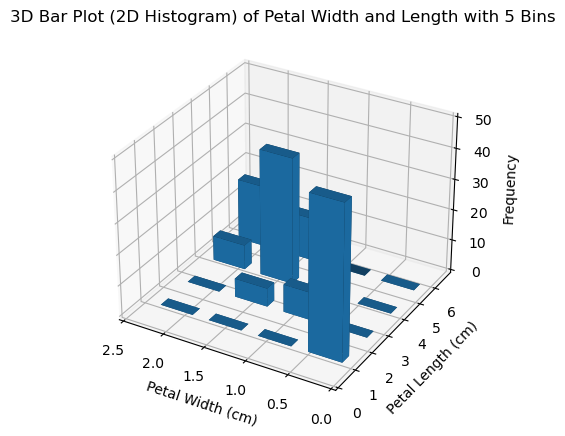

In [7]:
# Petal length and petal width are the third and fourth columns
petal_length = data[:, 2]
petal_width = data[:, 3]

# Define bins for 2D histogram with 5 bins
x_bins = np.linspace(petal_width.min(), petal_width.max(), 5)  # Bins for petal width (now on x-axis)
y_bins = np.linspace(petal_length.min(), petal_length.max(), 5)  # Bins for petal length (now on y-axis)

# Calculate 2D histogram
hist, x_edges, y_edges = np.histogram2d(petal_width, petal_length, bins=[x_bins, y_bins])

# Construct arrays for the positions of the bars
x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1])
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

# Construct array with bar heights
dx = dy = 0.4 * np.ones_like(z_pos)  # Set the width of the bars
dz = hist.flatten()

# Plot a 3D bar chart
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the bars for petal width (x-axis) and petal length (y-axis)
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, zsort='average', shade=True)

# Set labels and adjust axis limits
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Frequency')

# Adjust axis limits to start at 0
ax.set_xlim([petal_width.max(), 0])
ax.set_ylim([0, petal_length.max()])

plt.title('3D Bar Plot (2D Histogram) of Petal Width and Length with 5 Bins')
plt.show()

# Box plots

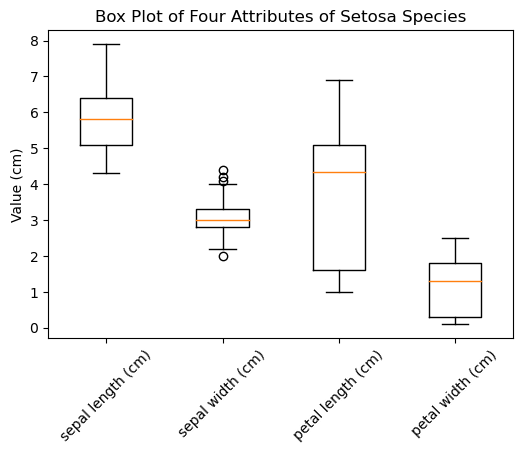

In [8]:
# Create a box plot for the four attributes 
plt.figure(figsize=(6, 4))
plt.boxplot(data, labels=iris.feature_names)

# Add title and labels
plt.title('Box Plot of Four Attributes of Setosa Species')
plt.ylabel('Value (cm)')
plt.xticks(rotation=45)
plt.show()

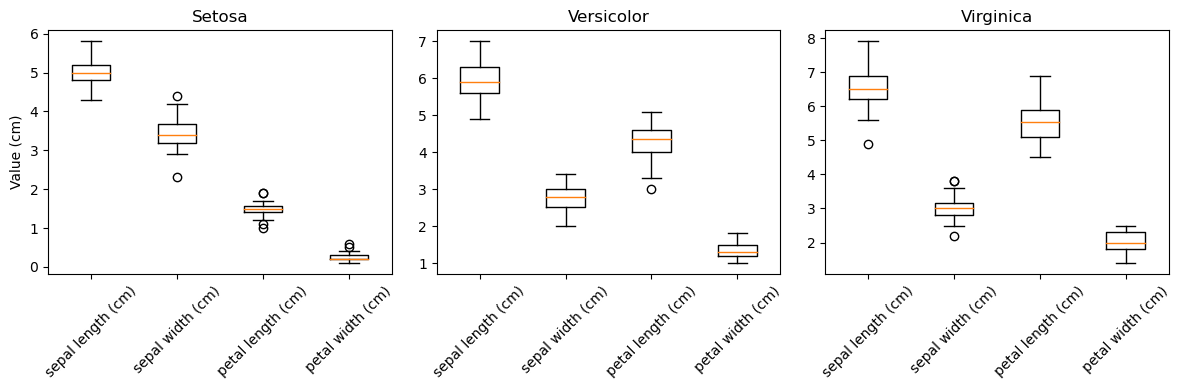

In [9]:
# Filter data for each species
setosa_data = iris.data[iris.target == 0]
versicolor_data = iris.data[iris.target == 1]
virginica_data = iris.data[iris.target == 2]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the boxplot for Setosa
axs[0].boxplot(setosa_data, labels=iris.feature_names)
axs[0].set_title('Setosa')
axs[0].set_ylabel('Value (cm)')

# Plot the boxplot for Versicolor
axs[1].boxplot(versicolor_data, labels=iris.feature_names)
axs[1].set_title('Versicolor')

# Plot the boxplot for Virginica
axs[2].boxplot(virginica_data, labels=iris.feature_names)
axs[2].set_title('Virginica')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.set_xticklabels(iris.feature_names, rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Pie Chart

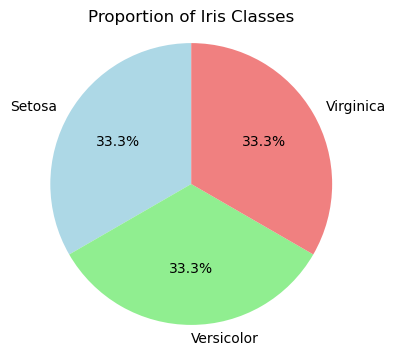

In [10]:
# Count the number of samples for each class
class_counts = [sum(iris.target == i) for i in range(3)]
class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Iris Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Scater Plots Matrix

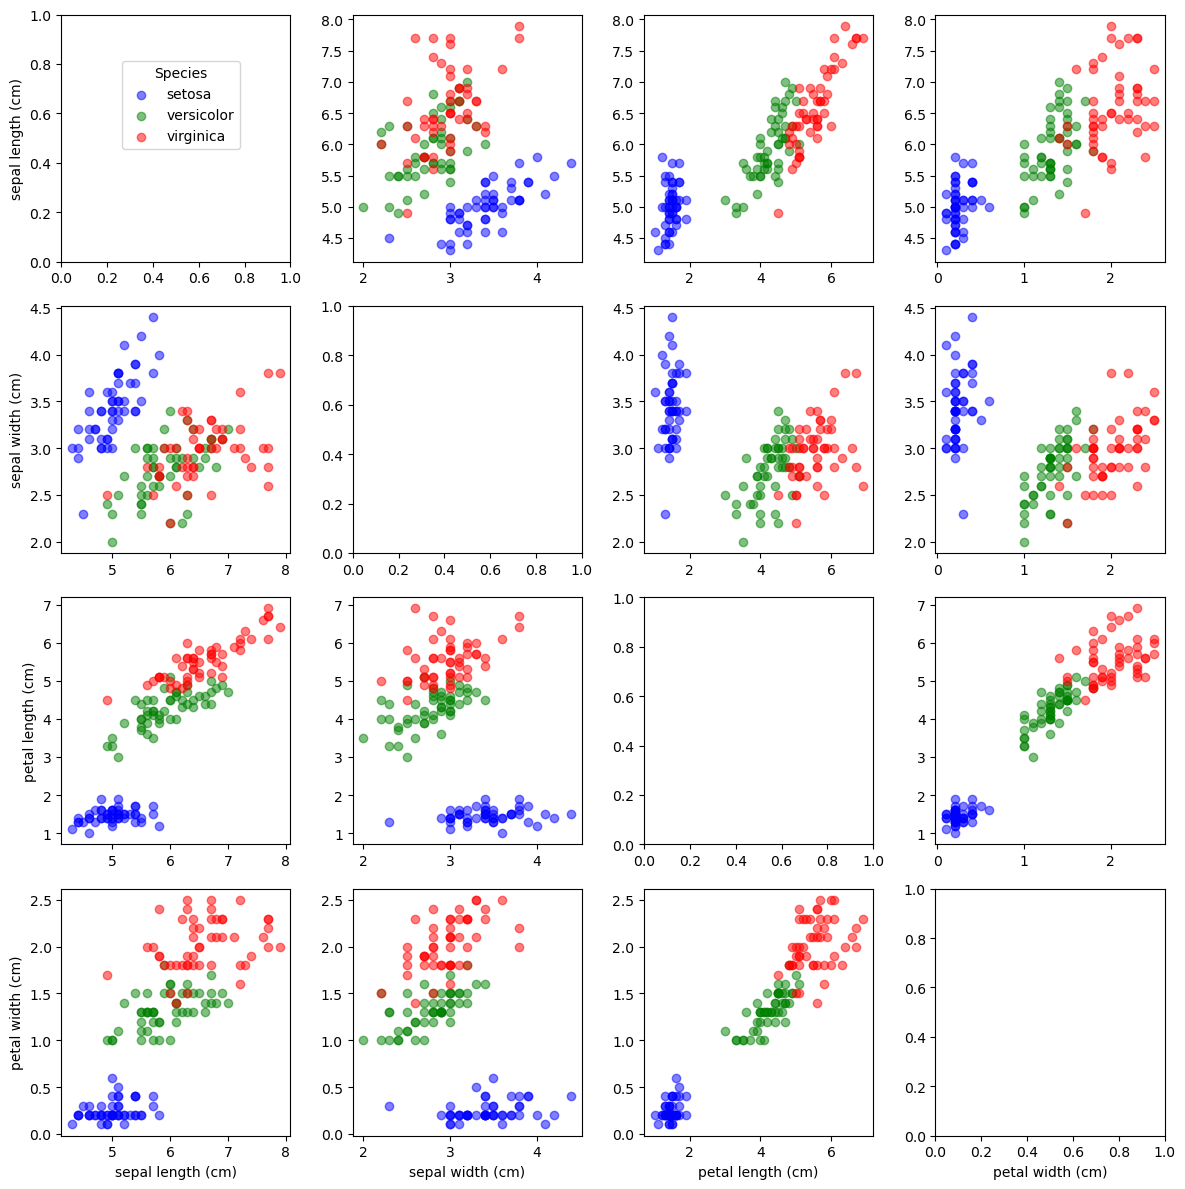

In [11]:
# Number of features
n_features = data.shape[1]

# Create a figure with subplots in a 4x4 layout
fig, ax = plt.subplots(n_features, n_features, figsize=(12, 12))

# Color map for different classes
colors = ['blue', 'green', 'red']
class_labels = iris.target_names

# Plot each pair of features
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            # Off-diagonal: Scatter plots
            for color, idx, label in zip(colors, np.unique(target), class_labels):
                ax[i, j].scatter(data[target == idx, j], data[target == idx, i], c=color, label=label if i == n_features - 1 and j == 0 else "", alpha=0.5)
        if i == n_features - 1:
            ax[i, j].set_xlabel(feature_names[j])
        if j == 0:
            ax[i, j].set_ylabel(feature_names[i])

# Add a legend
handles, labels = ax[n_features-1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1, 0.95), title='Species')

plt.tight_layout()
plt.show()

# Data Matrix

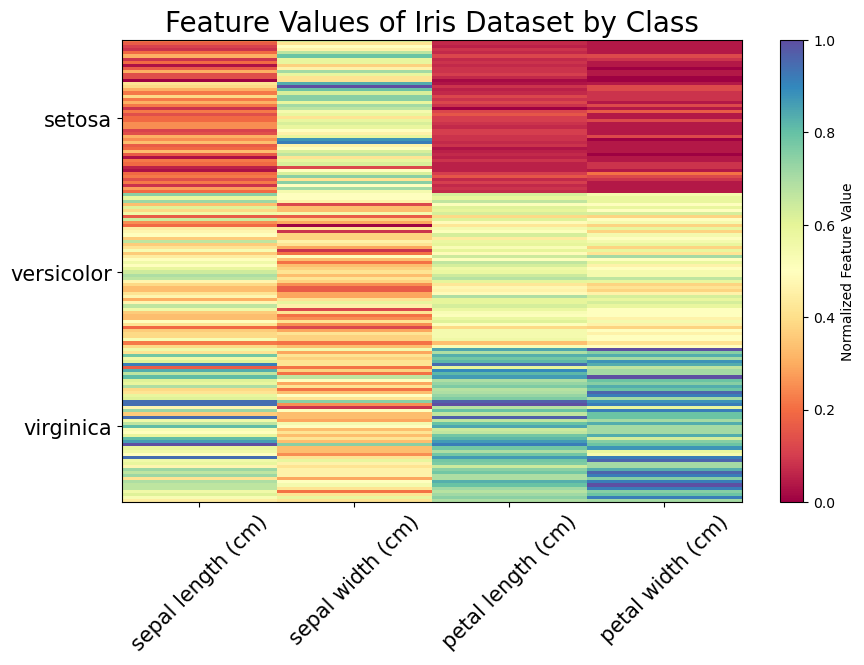

In [12]:
# Normalize the data to [0, 1] for better visualization
data_normalized = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Separate data by class
class_0 = data_normalized[target == 0]
class_1 = data_normalized[target == 1]
class_2 = data_normalized[target == 2]

# Stack the data by class
grouped_data = np.vstack([class_0, class_1, class_2])

# Plotting the grouped data matrix
plt.figure(figsize=(10, 6))
cmap = plt.cm.Spectral       
im = plt.imshow(grouped_data, aspect='auto', interpolation='none', cmap=cmap)
plt.colorbar(im, label='Normalized Feature Value')

# Prepare y-ticks to label samples by class
class_0_center = class_0.shape[0] / 2
class_1_center = class_0.shape[0] + class_1.shape[0] / 2
class_2_center = class_0.shape[0] + class_1.shape[0] + class_2.shape[0] / 2
plt.yticks(ticks=[class_0_center, class_1_center, class_2_center], labels=iris.target_names, fontsize=15)

# Set the labels for the x-axis
plt.xticks(ticks=np.arange(data.shape[1]), labels=iris.feature_names, fontsize=15, rotation=45)

plt.title('Feature Values of Iris Dataset by Class', fontsize=20)
plt.show()

# Correlation Matrix

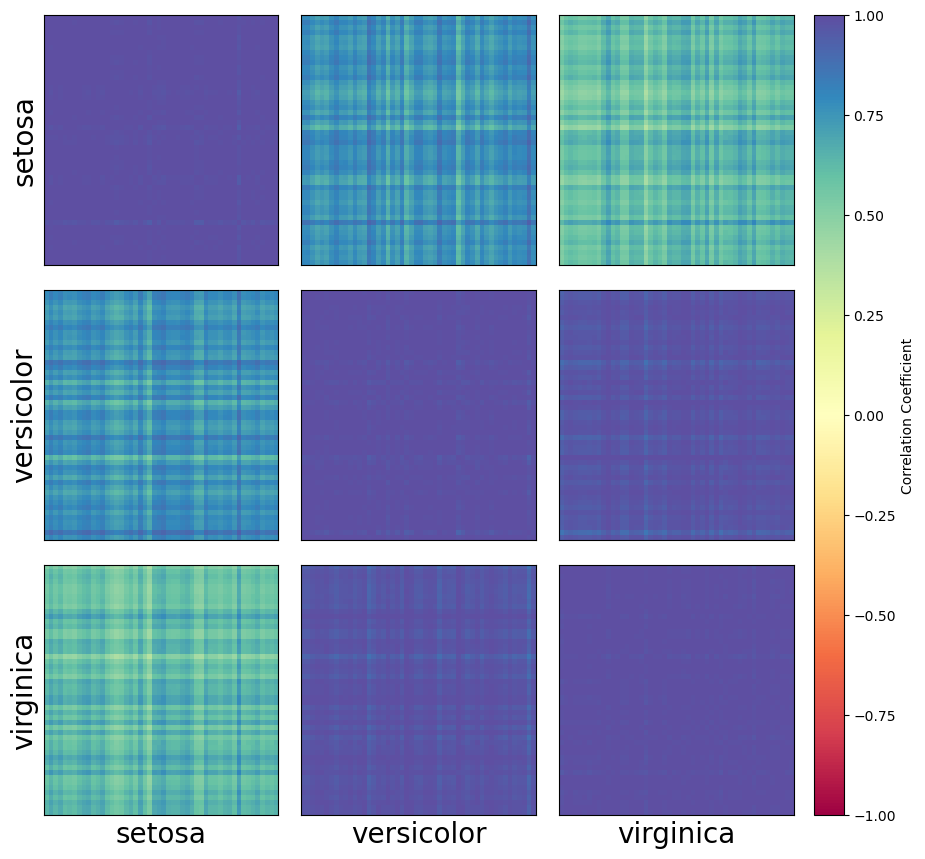

In [13]:
# Separate data by class
class_0 = data[target == 0]
class_1 = data[target == 1]
class_2 = data[target == 2]

# List of classes for easy iteration
classes = [class_0, class_1, class_2]
class_names = iris.target_names

# Create a figure with subplots in a 3x3 layout
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

cmap = plt.cm.Spectral 

# Iterate over pairs of classes
for i, class_i in enumerate(classes):
    for j, class_j in enumerate(classes):
        # Compute the sample-wise correlations between vectors
        # Calculate the correlation between each pair of sample vectors from class_i and class_j
        n_samples_i = class_i.shape[0]
        n_samples_j = class_j.shape[0]
        
        correlation_matrix = np.zeros((n_samples_i, n_samples_j))
        
        for k in range(n_samples_i):
            for l in range(n_samples_j):
                # Compute the Pearson correlation between two sample vectors (across all features)
                corr = np.corrcoef(class_i[k], class_j[l])[0, 1]
                correlation_matrix[k, l] = corr
        
        # Display the correlation matrix as a heatmap
        im = axs[i, j].imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, aspect='auto')

        # Set class names as x and y labels only on the outer plots
        if i == 2:
            axs[i, j].set_xlabel(class_names[j], fontsize=20)  # X-axis label
        if j == 0:
            axs[i, j].set_ylabel(class_names[i], fontsize=20)  # Y-axis label

        # Remove x and y ticks for clarity
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

# Adjust layout and add colorbar
# fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.1, 0.03, 0.8])  # Position for the colorbar
fig.colorbar(im, cax=cbar_ax, label='Correlation Coefficient')

# plt.tight_layout()
# Adjust layout manually
fig.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)
plt.show()

# Parallel Coordinates Plots 

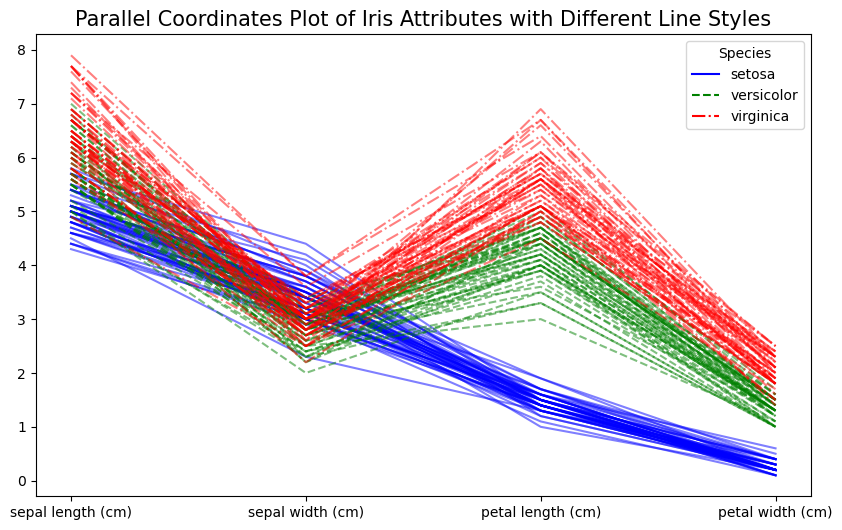

In [14]:
# Define line styles and colors for each class
styles = ['-', '--', '-.']
colors = ['b', 'g', 'r']

# Create a figure for the parallel coordinates plot
plt.figure(figsize=(10, 6))

# Plot each class with a different line style and color
for i, class_name in enumerate(target_names):
    class_data = data[target == i]
    for sample in class_data:
        plt.plot(iris.feature_names, sample, linestyle=styles[i], color=colors[i], alpha=0.5)

# Add a legend to differentiate species
for i, class_name in enumerate(target_names):
    plt.plot([], [], color=colors[i], linestyle=styles[i], label=class_name)

# Customize the plot
plt.title('Parallel Coordinates Plot of Iris Attributes with Different Line Styles', fontsize=15)
# plt.xlabel('Attributes', fontsize=12)
# plt.ylabel('Attribute Values', fontsize=12)
plt.legend(title='Species')

# Show the plot
plt.show()

In [ ]:
# reorder the features for better visualization

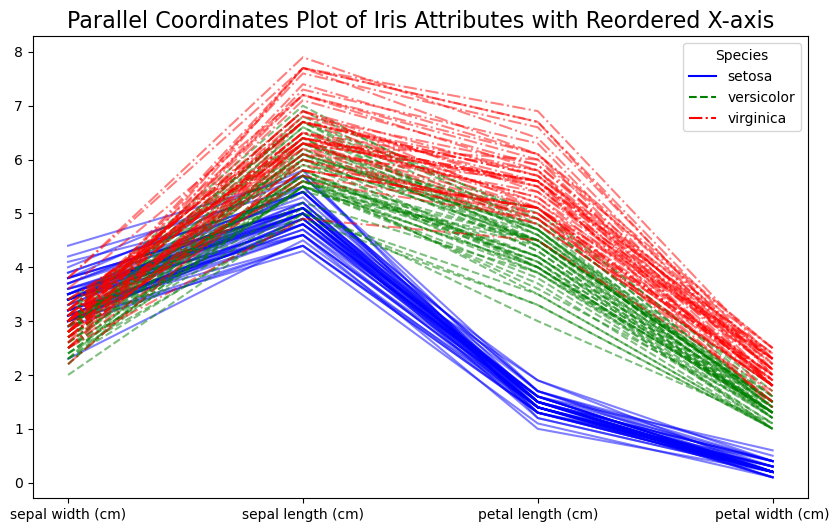

In [15]:
# Reorder the columns: sepal width, sepal length, petal length, and petal width
reordered_indices = [1, 0, 2, 3]  # Indices of the reordered columns
data_reordered = data[:, reordered_indices]
feature_names_reordered = np.array(iris.feature_names)[reordered_indices]

# Define line styles and colors for each class
styles = ['-', '--', '-.']
colors = ['b', 'g', 'r']

# Create a figure for the parallel coordinates plot
plt.figure(figsize=(10, 6))

# Plot each class with a different line style and color
for i, class_name in enumerate(target_names):
    class_data = data_reordered[target == i]
    for sample in class_data:
        plt.plot(feature_names_reordered, sample, linestyle=styles[i], color=colors[i], alpha=0.5)

# Add a legend to differentiate species
for i, class_name in enumerate(target_names):
    plt.plot([], [], color=colors[i], linestyle=styles[i], label=class_name)

# Customize the plot
plt.title('Parallel Coordinates Plot of Iris Attributes with Reordered X-axis', fontsize=16)
# plt.xlabel('Attributes', fontsize=12)
# plt.ylabel('Attribute Values', fontsize=12)
plt.legend(title='Species')

# Show the plot
plt.show()